# Differentiating Genres using K-means Clustering

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model  
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
song_features = pd.DataFrame()
# normalizer instance
scaler = MinMaxScaler()
for col in df.iloc[:,:-1].columns:      # excluding year col
    if df[col].dtypes in ['float64', 'int64']:
        # adding normalized col
        scaler.fit(df[[col]])
        song_features[col] = scaler.transform(df[col].values.reshape(-1,1)).ravel()     

In [4]:
km = KMeans()
k_rng = range(1,200)
sse = [] 
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(1000))
    # calculating sse
    sse.append(km.inertia_) 

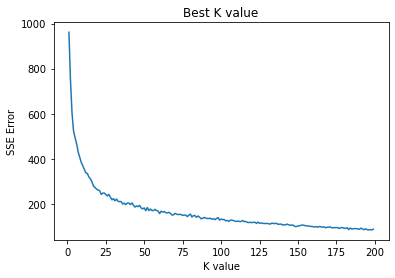

In [5]:
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
plt.show()

In [6]:
# According to elbow method 25 seems like a good value
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)

In [7]:
song_features['predicted_genres'] = predicted_genres
song_features['predicted_genres'] = song_features['predicted_genres'].apply(lambda x: 'Genre'+ str(x))

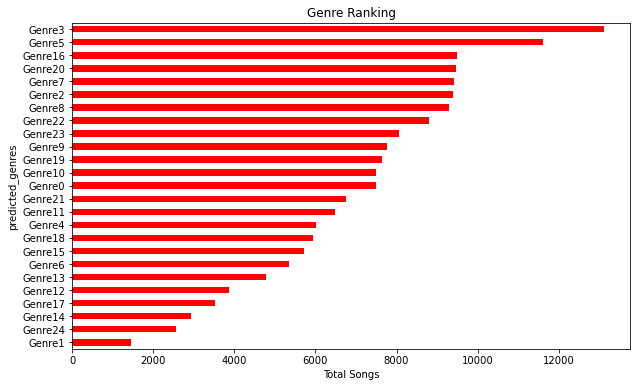

In [8]:
# checks how many songs falls in each Genre and which Genre have more songs
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='red')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()